# Trabalhando com os dados de Homícidios

Vamos limpar o arquivo .csv e trabalharemos com os resultados. Tentaremos montar gráficos de maneira que fique visual.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dados_brutos = pd.read_csv("Intentionalhomicides.csv")

## Correção do arquivo csv

Primeiro a gente precisa substituir o nome das coluna, pois algumas não estão nomeadas. Erro na produção do .csv Podemos substituir essas colunas de duas formas uma é usando o .rename(columns={'antigo': 'novo'}), e o outro é substituindo todas as colunas de uma vez. Outra maneira é utilizando o df.set_axis(['nova_col1', 'nova_col2'], axis=1, inplace=True)


In [4]:
coluna_antiga = list(dados_brutos.columns) #vai me retornar o nome da coluna transformados em lista
linha_antiga = list(dados_brutos.iloc[0]) #É os elementos da coluna que queremos transformados em lista

In [5]:
linha_antiga[1] = coluna_antiga[1] #Vai substituir a coluna do Nan da linha antiga em uma linha com nome
coluna_nova = linha_antiga.copy() #nossa coluna nova é apenas uma modificação da linha 1 antiga que continha as informações das colunas que queriamos.

Agora podemos substituir as colunas e podemos apagar a linha que contem as informações que não queriamos.

In [6]:
dados_brutos.drop(0, axis=0, inplace=True)
#Eliminamos a linha com as informações repetidas da tabela.

In [7]:
dados_corrigidos_coluna = dados_brutos.set_axis(coluna_nova, axis = 1).copy()

In [8]:
#Apagando colunas que não possuem dados significativos.
retirada_source = dados_corrigidos_coluna.drop("Source", axis = 1).copy()
retirada_footnote = retirada_source.drop("Footnotes", axis = 1).copy()

In [9]:
dataCerto = retirada_footnote.drop("Region/Country/Area", axis = 1).copy()

# Filtrando as informações por região e tipo de Ocorrido.

Após termos os dados filtrados, podemos agora trabalhar com apresentar esses dados de maneira mais clean, apresentando por ano e por região presente naquele ano. 

Ou seja, o que faremos é o usuário escolhe um ano e a gente simplesmente mostra os dados daquele ano e apresenta tambêm os dados de cada uma das regiões presentes naquele ano.

Temos 233 para analise.
Escolha um dos paises abaixo:
0. Afghanistan                         1. Africa                              2. Albania                             3. Algeria                            
4. American Samoa                      5. Americas                            6. Andorra                             7. Angola                             
8. Anguilla                            9. Antigua and Barbuda                 10. Argentina                          11. Armenia                           
12. Aruba                              13. Asia                               14. Australia                          15. Australia and New Zealand         
16. Austria                            17. Azerbaijan                         18. Bahamas                            19. Bahrain                           
20. Bangladesh                         21. Barbados                           22. Belarus                            23. Belgium                           
24. Belize

 Brazil


Foram feitas 7 analise.
 Abaixo estão os gráficos:


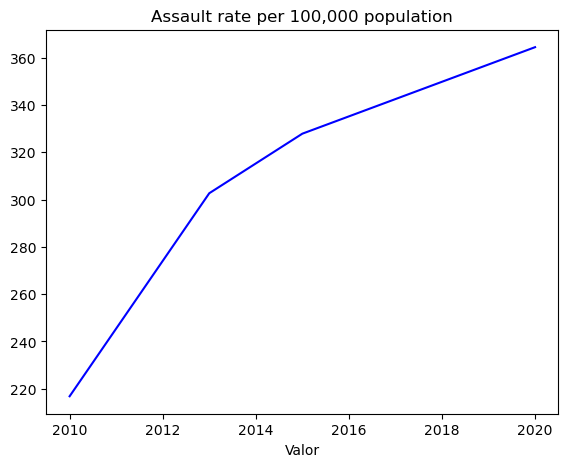

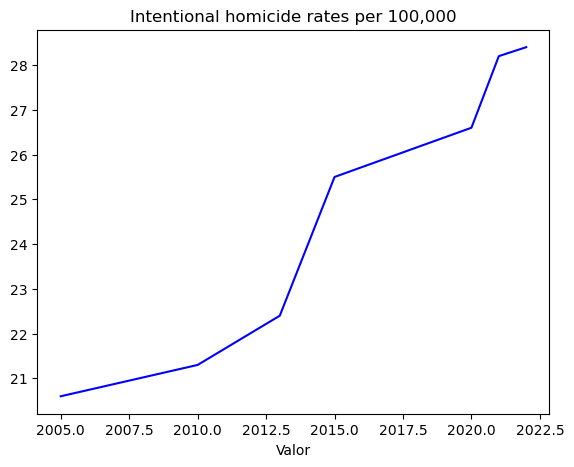

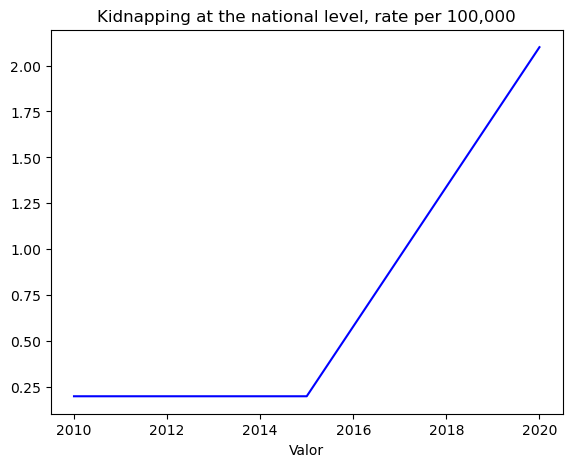

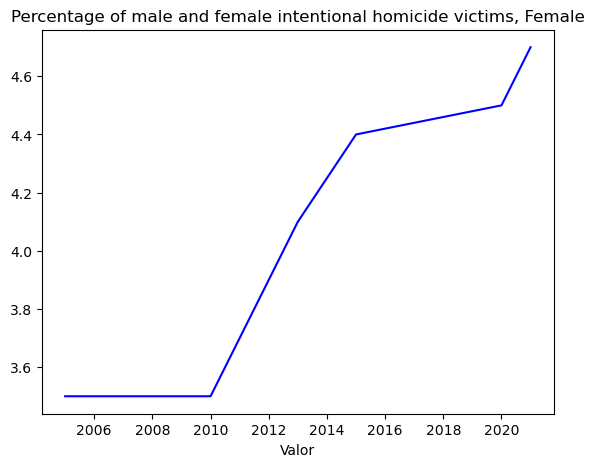

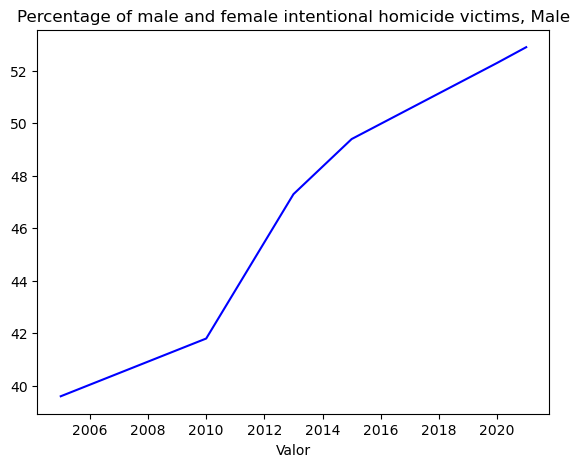

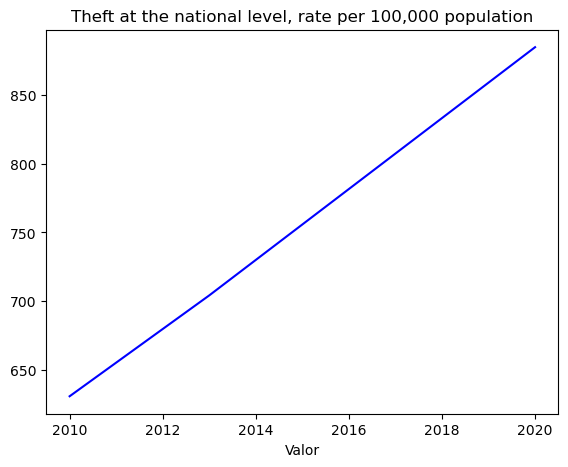

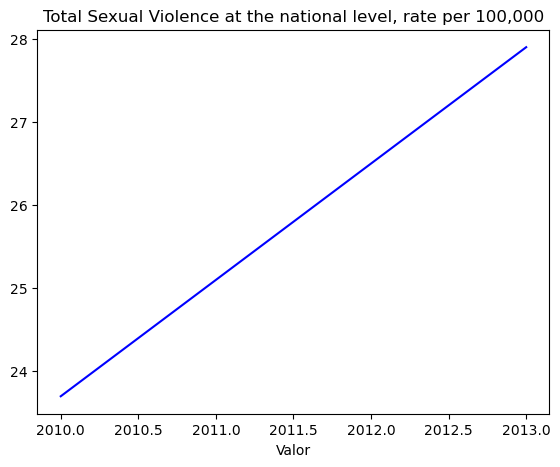

In [31]:
def Paises (data):
    paises = {pais: grupo for pais, grupo in dataCerto.groupby('Intentional homicides and other crimes')} #separa o data frame em paises.
    #Ele cria um dicionario, podemos acessar eles utilizando o atributo .keys() de dict
    paises_analisados = list(paises.keys())

    print(f"Temos {len(paises_analisados)} para analise.\nEscolha um dos paises abaixo:")

    #Esse bloco faz a criação das strings que serão printadas para o usuario, para que ele escolha qual pais ele quer visualizar os resultados.
    cont = 0
    while cont < len(paises_analisados):
        elementos,cont1 = [],1
        while cont1 <= 4 and cont < len(paises_analisados):
            escolha = f"{cont}. {paises_analisados[cont]} "
            elementos.append(f"{escolha:<38}")
            cont += 1
            cont1 += 1
        print(*elementos)
    return paises
###---------------------------------------------------------------------------------------------------------------------------###
def Analise(dados, pais):
    dadoPAnalise = dados[pais]
    serie = {tipo: grupo for tipo, grupo in dadoPAnalise.groupby('Series')}
    tipos_series = list(serie.keys())

    print(f"Foram feitas {len(tipos_series)} analise.\n Abaixo estão os gráficos:")
    for i in range(len(tipos_series)):
        Valor(serie, tipos_series[i], pais)
    
    return
###---------------------------------------------------------------------------------------------------------------------------###
def Valor(dado, serie, Pais):
    dadoPAnalise = dado[serie]
    fig = plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    #print(type(dadoPAnalise.loc[872,"Year"]))
    eixo_anos = sorted(list(map(int, dadoPAnalise["Year"])))
    eixo_valor = sorted(list(map(float, dadoPAnalise["Value"])))

    
    axes.plot(eixo_anos,eixo_valor, "b")
    axes.set_xlabel("Anos")
    axes.set_xlabel("Valor")
    axes.set_title(serie)
    
    #Essa linha é para salvar as imagens
    #plt.savefig(f"Grafico de {serie} do {Pais}.png") 
    plt.show()
    return
###---------------------------------------------------------------------------------------------------------------------------###
def main():
    dado = Paises(dataCerto) #Primeiro geramos todos os paises que temos a chance de analisar
    print("Digite o nome do pais abaixo: ")
    escolha_pais = input()
    ana = Analise(dado, escolha_pais) #geramos a biblioteca de analises possiveis

if __name__ == '__main__':
    main()